<a href="https://colab.research.google.com/github/CallumCoffey/ANN/blob/main/4_1_rbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Restricted Boltzmann Machines
=============================

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import copy
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.grid'] = False

if 'google.colab' in sys.modules and 'sklearn' not in sys.modules:
    !pip3 install scikit-learn

from keras.datasets import mnist
from sklearn.neural_network import BernoulliRBM

We consider some utility functions to be used later.

In [ ]:
def rbm_gibbs_sample_image(rbm, im, steps):
  assert len(im.shape) < 3
  if len(im.shape) == 2:
    rows = im.shape[0]
    cols = im.shape[1]
    im = im.reshape((-1))
  else:
    im = im.copy()
  for _ in range(steps):
    im = rbm.gibbs(im)
    if len(im.shape) == 2:
      if rows is not None and cols is not None:
        im = im.reshape((rows, cols))
  return im.astype('float32')

def image_palette(X, nr = None, m = 20):
  if nr is None:
    nr = X.shape[0]
  return np.rollaxis(np.rollaxis(X[0:nr].reshape(m, -1, 28, 28), 0, 2), 1, 3).reshape(-1, m * 28)

def remove_rows(X, start, end):
  X = X.copy()
  if len(X.shape) == 2:
    X[start:end] = 0
  elif len(X.shape) == 3:
    X[:,start:end] = 0
  return X

Load the Dataset
----------------
Good ol' MNIST.

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0],-1))
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_test = X_test[0:100]

11490434/11490434 [==============================] - 0s 0us/step


(-0.5, 559.5, 139.5, -0.5)

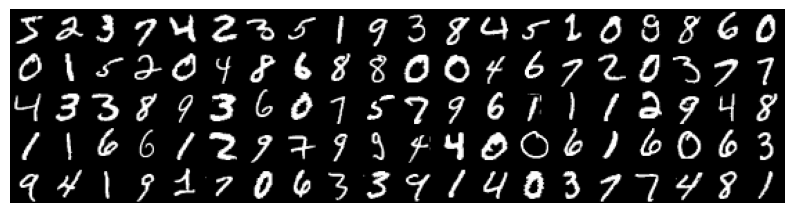

In [ ]:
flattened_images = image_palette(X_train, 100)
plt.figure(figsize=(10,20))
plt.imshow(flattened_images)
plt.axis('off')

Train the RBM
-------------
**Exercise** What is the effect of the different parameters: **n_components**, **learning_rate**, **n_iter**. These parameters are, respectively, the number of components, the learning rate and the number of iterations. <br/>
Evaluate the performance visually in the next code cell.


In [ ]:
# n_components = 10
# lr = 0.001
# n_iter = 10

# n_components = 29
# lr = 0.066
# n_iter =  18

n_components = 500
lr = 0.015
n_iter =  30

rbm = BernoulliRBM(n_components=n_components, learning_rate=lr, random_state=0, n_iter=n_iter, verbose=True)
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -85.24, time = 55.02s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -75.46, time = 41.17s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -72.99, time = 38.71s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -71.49, time = 40.17s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -68.59, time = 40.42s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -68.43, time = 37.58s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -67.99, time = 39.03s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -68.24, time = 42.51s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -65.51, time = 38.23s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -66.53, time = 38.86s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -64.48, time = 40.82s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -63.82, time = 38.01s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -63.78, time = 39.85s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -64.35, time = 41.70s
[BernoulliRBM] 

BernoulliRBM(learning_rate=0.015, n_components=500, n_iter=30, random_state=0,
             verbose=True)

In [ ]:
n_components = 500
lr = 0.01
n_iter =  15
rbm_small = BernoulliRBM(n_components=n_components, learning_rate=lr, random_state=0, n_iter=n_iter, verbose=True)
rbm_small.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -93.56, time = 23.48s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -82.23, time = 27.43s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -78.06, time = 27.82s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -74.75, time = 26.39s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -72.74, time = 24.69s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -70.36, time = 25.40s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -69.96, time = 27.32s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -69.36, time = 26.57s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -68.18, time = 25.70s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -66.96, time = 25.27s


BernoulliRBM(learning_rate=0.01, n_components=300, random_state=0, verbose=True)

In [ ]:
# rbm = rbm_small
rbm = rbm_big

Sample the Trained RBM and Show the Results
-------------------------------------------
The gibbs_steps variable determines how many Gibbs sampling steps will be performed for each test image i.e. with the test images as initialization. <br/>
**Exercise** Try different values and observe the result. Can you explain the result? <br/>
Compare the result with the original test images, shown one cell lower.


Original
Gibbs = 5


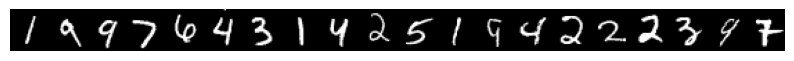

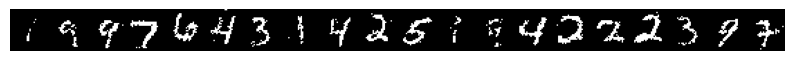

In [ ]:
index1 = 55
# index1 = 28
index2 = index1 + 30

gibbs_steps = 5

print('Original')
plt.figure(figsize=(10,20))
plt.imshow(image_palette(X_test)[index1:index2])
plt.axis('off')

gibbsRBM1 = copy.deepcopy(rbm)

a = X_test.copy()
for i in range(a.shape[0]):
  for j in range(gibbs_steps):
    a[i] = gibbsRBM1.gibbs(a[i])
plt.figure(figsize=(10,20))
plt.imshow(image_palette(a)[index1:index2])
plt.axis('off')
print(f'Gibbs = {gibbs_steps}')


Original
Gibbs = 30


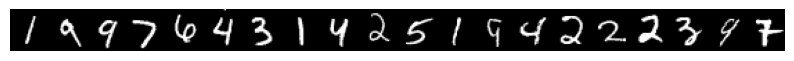

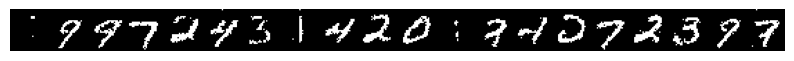

In [ ]:
gibbs_steps = 30

print('Original')
plt.figure(figsize=(10,20))
plt.imshow(image_palette(X_test)[index1:index2])
plt.axis('off')

gibbsRBM = copy.deepcopy(rbm)

a = X_test.copy()
for i in range(a.shape[0]):
  for j in range(gibbs_steps):
    a[i] = gibbsRBM.gibbs(a[i])
plt.figure(figsize=(10,20))
plt.imshow(image_palette(a)[index1:index2])
plt.axis('off')
print(f'Gibbs = {gibbs_steps}')

Original
Gibbs = 100


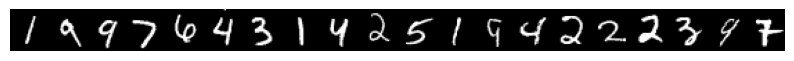

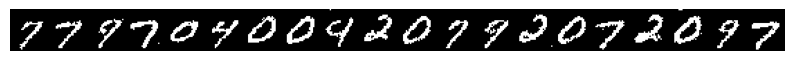

In [ ]:
gibbs_steps = 100

print('Original')
plt.figure(figsize=(10,20))
plt.imshow(image_palette(X_test)[index1:index2])
plt.axis('off')

gibbsRBM = copy.deepcopy(rbm)

a = X_test.copy()
for i in range(a.shape[0]):
  for j in range(gibbs_steps):
    a[i] = gibbsRBM.gibbs(a[i])
plt.figure(figsize=(10,20))
plt.imshow(image_palette(a)[index1:index2])
plt.axis('off')
print(f'Gibbs = {gibbs_steps}')

## Reconstruction of Unseen Images
In this cell, we will remove pixel rows from certain images. Using the recently trained RBM, we will then try to reconstruct the original images.  <br/>
The following variables control this process: <br/>


*   **reconstruction_gibbs_steps**: The number of gibbs steps used to reconstruct the image.
*   **start_test_index**: The first index of the test set to use.
*   **nr**: the number of images starting from **start_test_index** to reconstruct.
*   **start_row_to_remove**:  The index of the first row that should be removed.
*   **end_row_to_remove**: The index up to which the rows should be removed.

**Exercise** Adjust these variables and observe the result of the reconstruction in the shown image.
What is the role of the previously seen RBM hyperparameters on the reconstruction? <br/>
How many rows can you remove such that reconstruction is still possible? <br/>
In the next code cell, the removed rows will be replaced by the reconstructed rows.




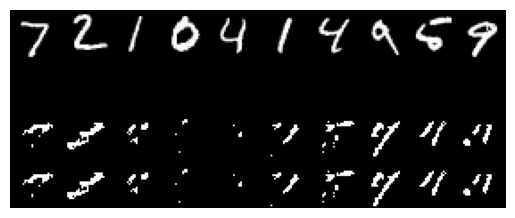

In [ ]:
rbm3 = copy.deepcopy(rbm)
reconstruction_gibbs_steps = 15
start_test_index = 0
nr = 10
band = 40
start_row_to_remove = 0
end_row_to_remove = start_row_to_remove + band

original = X_test[start_test_index:start_test_index + nr].reshape((-1,28,28))

to_reconstruct = X_test[start_test_index:start_test_index + nr].reshape((-1,28,28))
to_reconstruct = remove_rows(to_reconstruct, start_row_to_remove, end_row_to_remove)

combined_images = np.concatenate((original,to_reconstruct), axis=1)

reconstructed = np.zeros(to_reconstruct.shape)
for i in range(nr):
  reconstructed[i] = rbm_gibbs_sample_image(rbm3, to_reconstruct[i], reconstruction_gibbs_steps).reshape((28,28))

combined_images = np.concatenate((combined_images,reconstructed), axis=1)

to_reconstruct[:,start_row_to_remove:end_row_to_remove] = reconstructed[:,start_row_to_remove:end_row_to_remove]
fig = plt.figure()
combined_images = np.concatenate((combined_images,to_reconstruct), axis=1)
for i in range(nr):
  ax1 = fig.add_subplot(1,nr,i+1)
  ax1.imshow(combined_images[i])
  ax1.axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

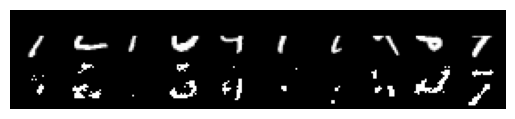

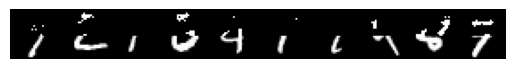

In [ ]:
rbm3 = copy.deepcopy(rbm)
reconstruction_gibbs_steps = 8
start_test_index = 0
nr = 10
band = 15
start_row_to_remove = 0
end_row_to_remove = start_row_to_remove + band
to_reconstruct = X_test[start_test_index:start_test_index + nr].reshape((-1,28,28))
to_reconstruct = remove_rows(to_reconstruct, start_row_to_remove, end_row_to_remove)
reconstructed = np.zeros(to_reconstruct.shape)
for i in range(nr):
  reconstructed[i] = rbm_gibbs_sample_image(rbm3, to_reconstruct[i], reconstruction_gibbs_steps).reshape((28,28))
combined_images = np.concatenate((to_reconstruct,reconstructed), axis=1)
fig = plt.figure()
for i in range(nr):
  ax1 = fig.add_subplot(1,nr,i+1)
  ax1.imshow(combined_images[i])
  ax1.axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
to_reconstruct[:,start_row_to_remove:end_row_to_remove] = reconstructed[:,start_row_to_remove:end_row_to_remove]
fig = plt.figure()
for i in range(nr):
  ax1 = fig.add_subplot(1,nr,i+1)
  ax1.imshow(to_reconstruct[i])
  ax1.axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

Original
Gibbs = 30
Gibbs = 30


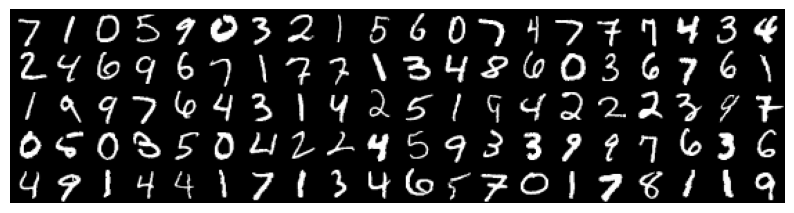

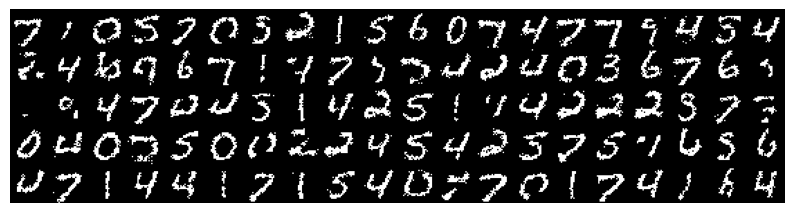

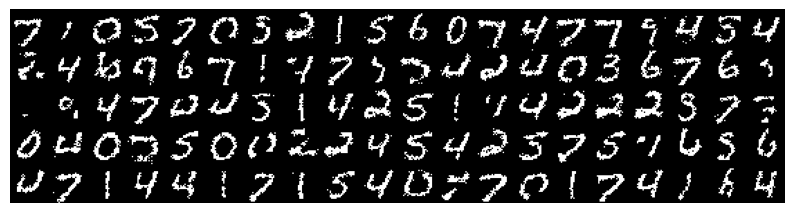

In [ ]:
gibbs_steps = 30

print('Original')
plt.figure(figsize=(10, 20))
plt.imshow(image_palette(X_test))
plt.axis('off')

gibbsRBM = copy.deepcopy(rbm)

a = X_test.copy()
for i in range(a.shape[0]):
    for j in range(gibbs_steps):
        a[i] = gibbsRBM.gibbs(a[i])

# Plotting
plt.figure(figsize=(10, 10))
plt.imshow(image_palette(a))
plt.axis('off')
print(f'Gibbs = {gibbs_steps}')

gibbsRBM = copy.deepcopy(rbm)

a = X_test.copy()
for i in range(a.shape[0]):
    for j in range(gibbs_steps):
        a[i] = gibbsRBM.gibbs(a[i])

# Plotting
plt.figure(figsize=(10, 10))
plt.imshow(image_palette(a))
plt.axis('off')
print(f'Gibbs = {gibbs_steps}')


## Component Visualization
In the final cell, the components (weights of each neuron) of the RBM are shown.<br/>
Observing these components (think back to CNNs) may offer insights into the trained model.

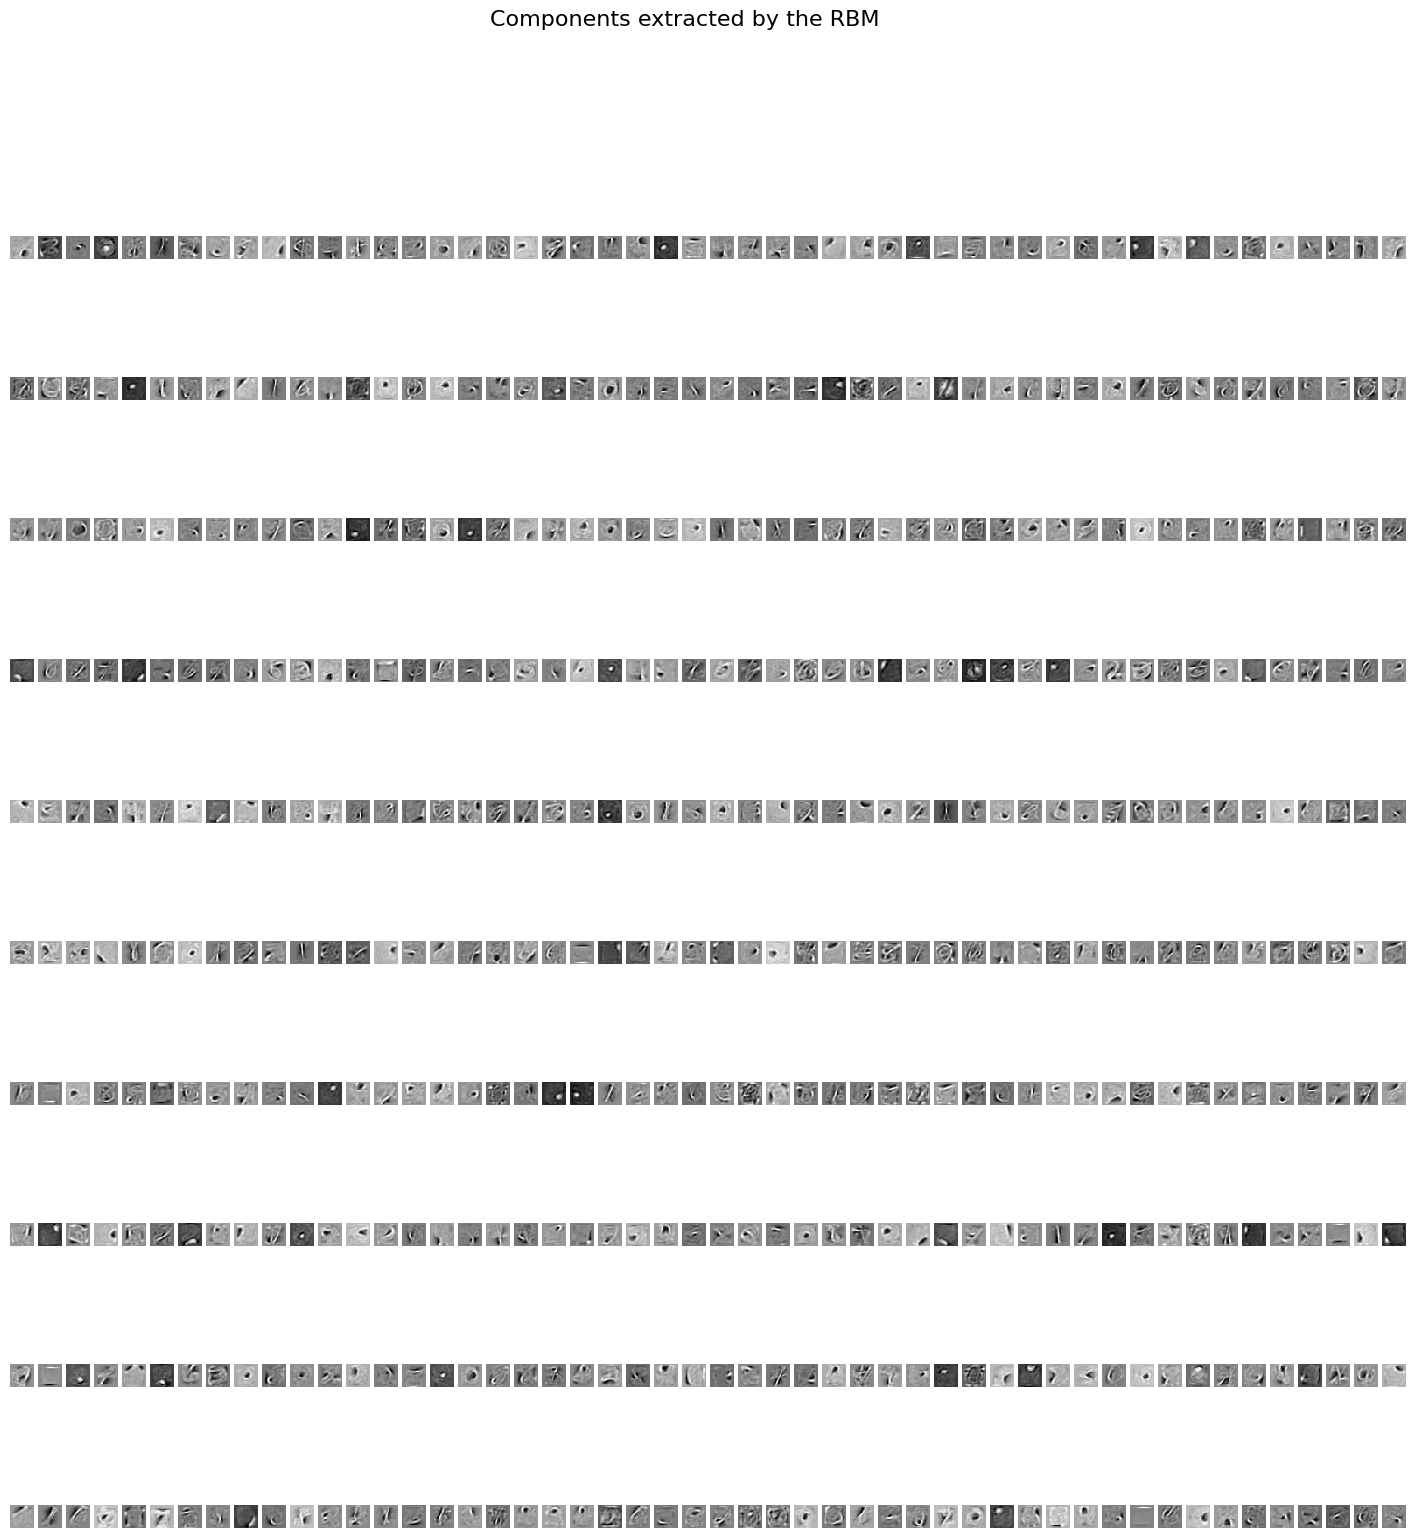

In [ ]:
plt.figure(figsize=(18, 18))
nr_components = rbm.components_.shape[0]
for i in range(nr_components):
    c = rbm.components_[i]
    plt.subplot(10, int(np.ceil(nr_components/10)), i + 1)
    plt.imshow(c.reshape((28, 28)), cmap = "gray", interpolation='nearest')
    plt.axis('off')

plt.suptitle('Components extracted by the RBM', fontsize=16);

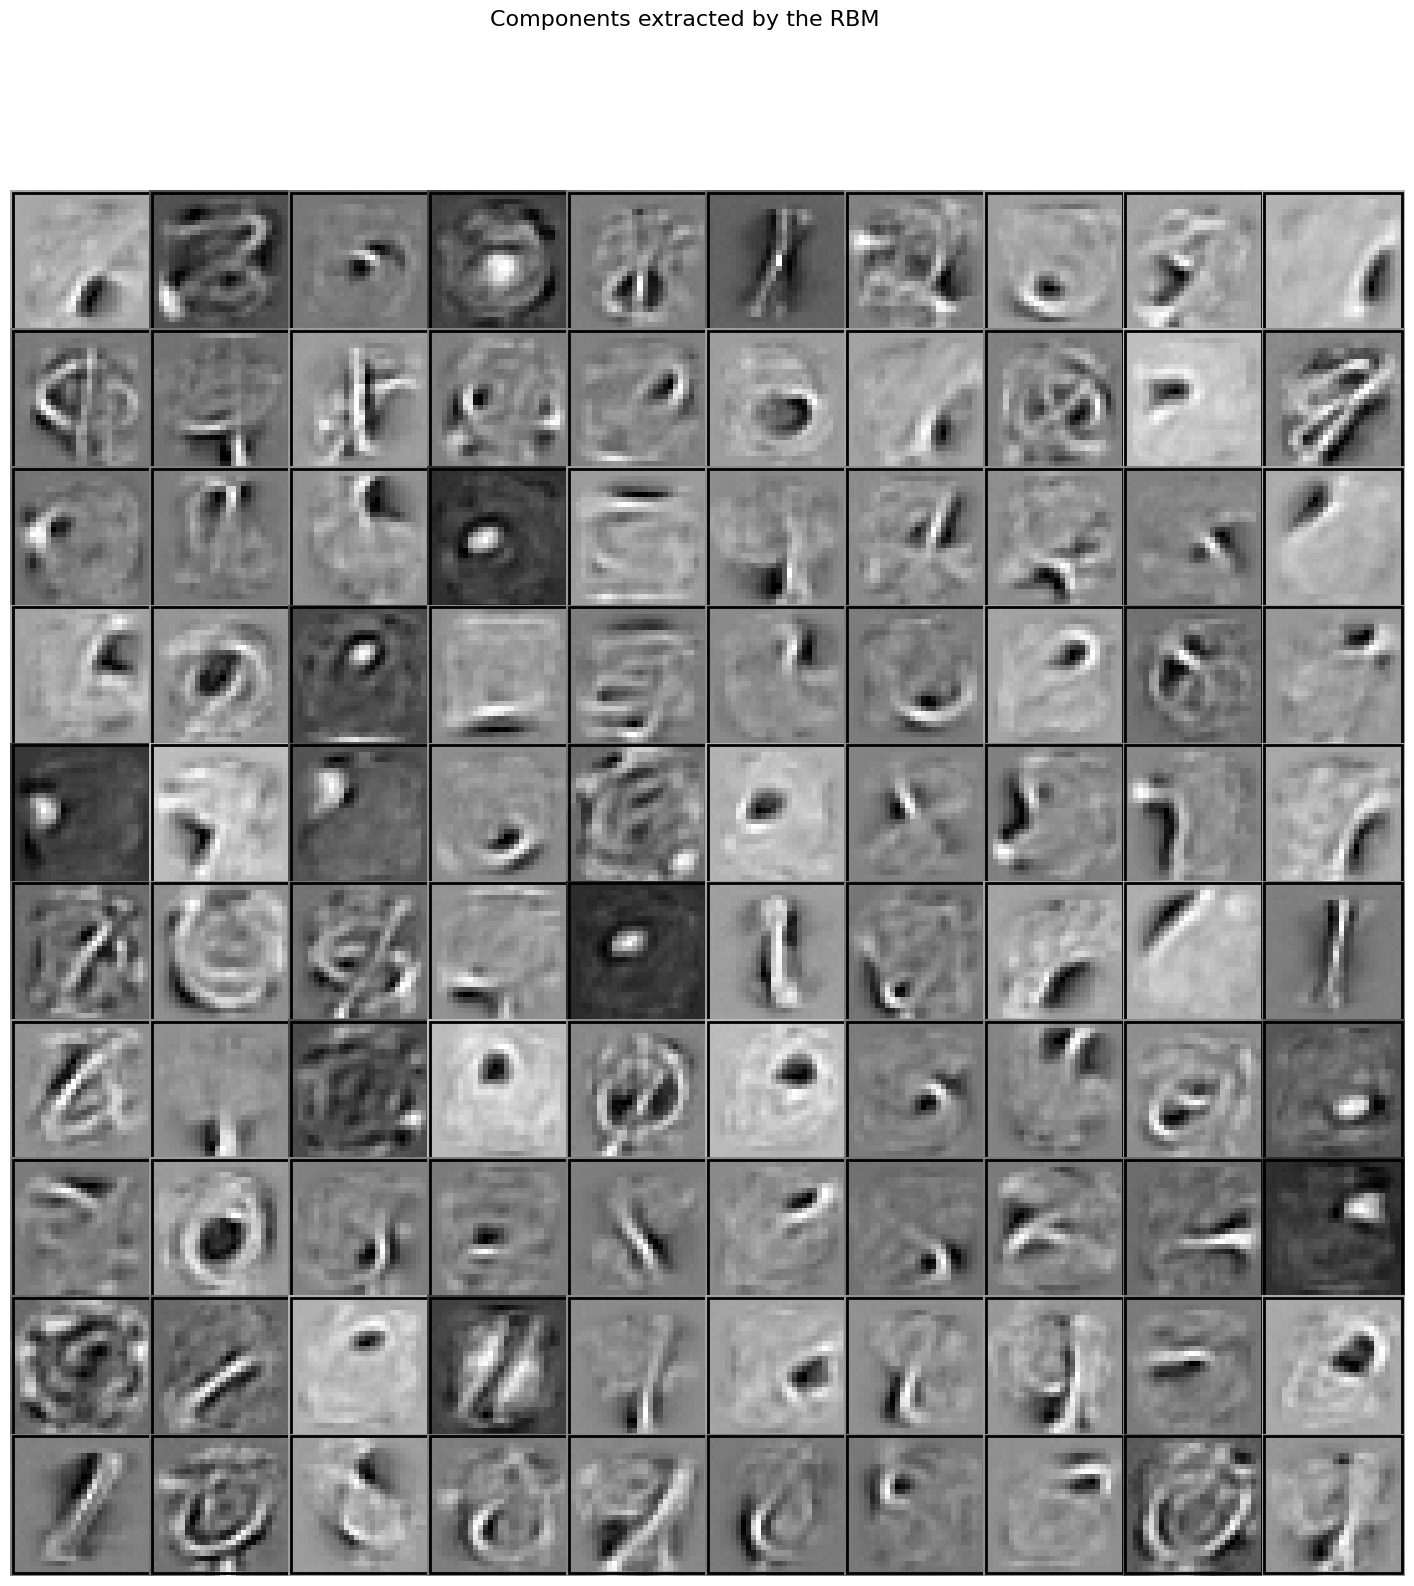

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

nr_components = rbm_small.components_.shape[0]
fig = plt.figure(figsize=(18, 18))  # Adjust figsize as needed
for i in range(100):
    c = rbm.components_[i]
    ax = plt.subplot(10, 10, i + 1)  # Set the subplot to a 10 by 10 grid
    ax.imshow(c.reshape((28, 28)), cmap="gray", interpolation='nearest')

    # Add black border
    rect = patches.Rectangle((0,0),27,27,linewidth=2,edgecolor='black',facecolor='none')
    ax.add_patch(rect)

    ax.axis('off')

plt.subplots_adjust(wspace=-0.03, hspace=-0.03)  # Set wspace and hspace to 0 to remove space between components
plt.suptitle('Components extracted by the RBM', fontsize=16)
plt.show()


# Tuning


In [ ]:
pip install optuna

In [ ]:
import optuna
from sklearn.neural_network import BernoulliRBM
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Define a custom Keras callback for pruning
class KerasPruningCallback(keras.callbacks.Callback):
    def __init__(self, trial, monitor='val_loss'):
        super(KerasPruningCallback, self).__init__()
        self.trial = trial
        self.monitor = monitor

    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            return
        current_score = logs.get(self.monitor)
        if current_score is None:
            return

        self.trial.report(current_score, step=epoch)
        if self.trial.should_prune():
            self.model.stop_training = True
            raise optuna.TrialPruned(f'Trial was pruned at epoch {epoch}.')

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,          # Stop training if no improvement after 10 epochs
    restore_best_weights=True  # Restore weights from the epoch with the best validation loss
    )


# Define the objective function for Optuna
def objective(trial):
    # Hyperparameters to be optimized
    n_components = trial.suggest_int('n_components', 30, 100)
    # n_components_list = [5, 10, 20, 40]
    # n_components = trial.suggest_categorical('n_components', n_components_list)

    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.1, log=True)
    # learning_rate_list = [0.0001, 0.001, 0.01, 0.1]
    # learning_rate = trial.suggest_categorical('learning_rate', learning_rate_list)

    n_iter = 20
    # n_iter = trial.suggest_int('n_iter', 5, 30)
    # n_iter_list = [5, 10, 20]
    # n_iter = trial.suggest_categorical('n_iter', n_iter_list)

    # create model
    model = BernoulliRBM(n_components=n_components, learning_rate=learning_rate, random_state=0, n_iter=n_iter, verbose=True)

    #fit the model
    model.fit(X_train)

    error = np.mean([model.score_samples(X_test[i:i+1]) for i in range(X_test.shape[0])])
    return error


# Run the Optuna optimization
# LSTM_study = optuna.create_study(direction='minimize', pruner=optuna.pruners.MedianPruner(n_startup_trials=10, n_warmup_steps=20))
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print('Best trial:')
trial = study.best_trial
print(' Value: ', trial.value)
print(' Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')